# RANDOM THINGS

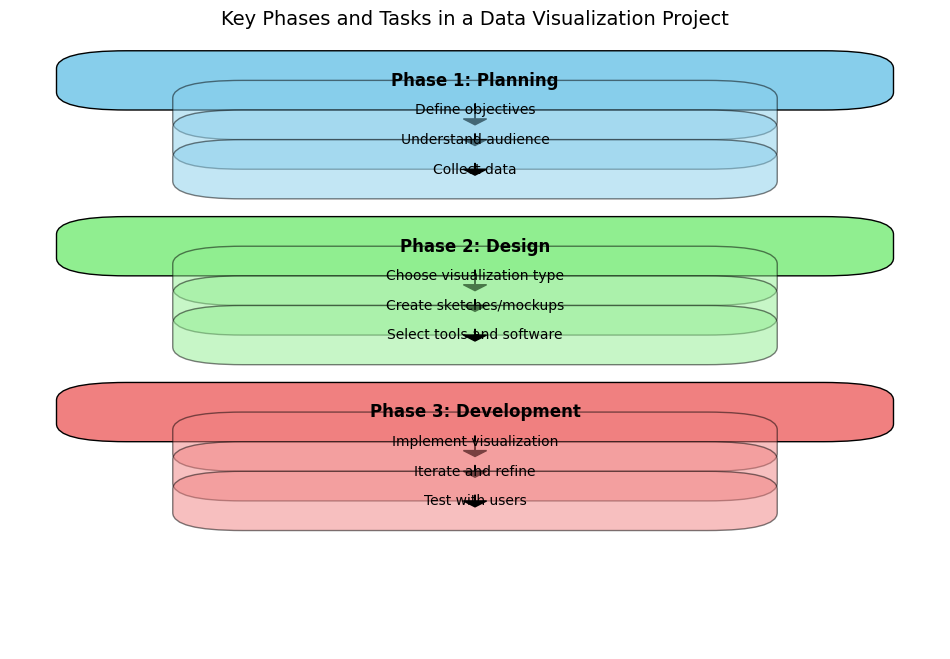

In [2]:
# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Phases and tasks
phases = {
    "Phase 1: Planning": [
        "Define objectives",
        "Understand audience",
        "Collect data"
    ],
    "Phase 2: Design": [
        "Choose visualization type",
        "Create sketches/mockups",
        "Select tools and software"
    ],
    "Phase 3: Development": [
        "Implement visualization",
        "Iterate and refine",
        "Test with users"
    ]
}

# Colors for each phase
colors = {
    "Phase 1: Planning": "skyblue",
    "Phase 2: Design": "lightgreen",
    "Phase 3: Development": "lightcoral"
}

# Plot each phase and its tasks
y_base = 0
box_height = 0.4
box_gap = 0.2
task_gap = 0.1
for phase, tasks in phases.items():
    color = colors[phase]
    phase_y_base = y_base
    ax.add_patch(mpatches.FancyBboxPatch((0, y_base), 3, box_height, boxstyle="round,pad=0.3", edgecolor='black', facecolor=color))
    ax.text(1.5, y_base + box_height / 2, phase, va='center', ha='center', fontsize=12, weight='bold')

    for i, task in enumerate(tasks):
        y_task = y_base - (i + 1) * (box_height + task_gap)
        ax.add_patch(mpatches.FancyBboxPatch((0.5, y_task), 2, box_height, boxstyle="round,pad=0.3", edgecolor='black', facecolor=color, alpha=0.5))
        ax.text(1.5, y_task + box_height / 2, task, va='center', ha='center', fontsize=10)
        if i == 0:
            # Draw arrow from phase to first task
            ax.arrow(1.5, phase_y_base - box_height / 2, 0, -box_height / 2 - task_gap / 2, head_width=0.1, head_length=0.1, fc='black', ec='black')

        if i > 0:
            # Draw arrow between tasks
            prev_y_task = y_base - i * (box_height + task_gap)
            ax.arrow(1.5, prev_y_task - box_height / 2, 0, -task_gap, head_width=0.1, head_length=0.1, fc='black', ec='black')

    y_base -= (len(tasks) + 1) * (box_height + task_gap + box_gap)

# Set limits and hide axes
ax.set_xlim(-0.5, 3.5)
ax.set_ylim(y_base - 1, 1)
ax.axis('off')

# Display the flow chart
plt.title("Key Phases and Tasks in a Data Visualization Project", fontsize=14)
plt.show()


# Bar chart for rankings

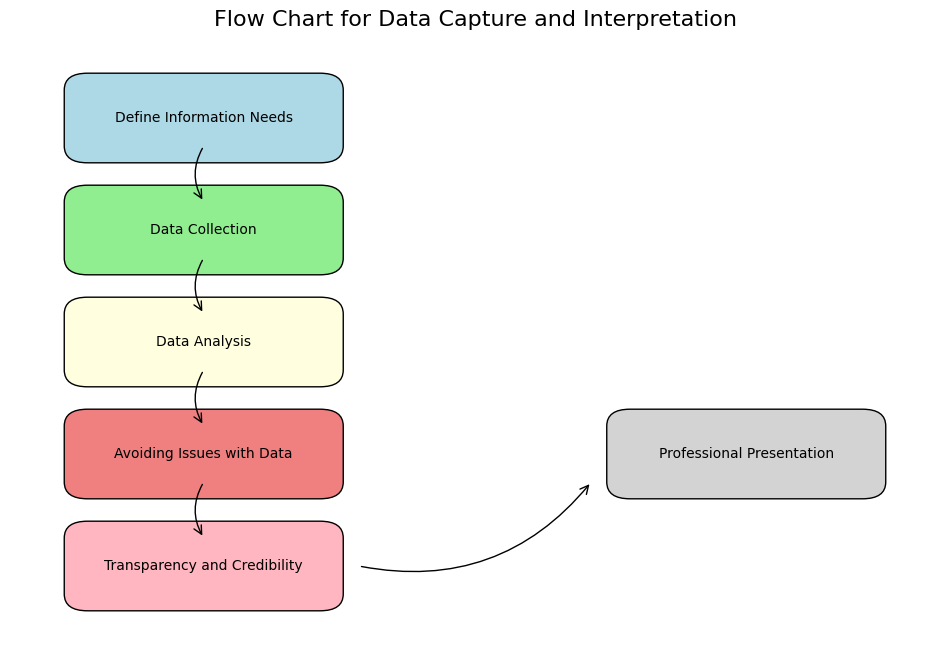

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(12, 8))

# Create a flowchart with boxes and arrows
def draw_box(ax, text, xy, box_style, facecolor):
    box = patches.FancyBboxPatch(xy, width=3, height=1, boxstyle=box_style, facecolor=facecolor, edgecolor='black')
    ax.add_patch(box)
    ax.text(xy[0] + 1.5, xy[1] + 0.5, text, ha='center', va='center', fontsize=10)

def draw_arrow(ax, start, end):
    arrow = patches.FancyArrowPatch(start, end, connectionstyle="arc3,rad=0.3", color='black', arrowstyle='->', mutation_scale=15)
    ax.add_patch(arrow)

# Boxes
boxes = [
    ("Define Information Needs", (1, 8), "round,pad=0.3", "lightblue"),
    ("Data Collection", (1, 6), "round,pad=0.3", "lightgreen"),
    ("Data Analysis", (1, 4), "round,pad=0.3", "lightyellow"),
    ("Avoiding Issues with Data", (1, 2), "round,pad=0.3", "lightcoral"),
    ("Transparency and Credibility", (1, 0), "round,pad=0.3", "lightpink"),
    ("Professional Presentation", (8, 2), "round,pad=0.3", "lightgrey")
]

# Arrows
arrows = [
    ((2.5, 8), (2.5, 7)),
    ((2.5, 6), (2.5, 5)),
    ((2.5, 4), (2.5, 3)),
    ((2.5, 2), (2.5, 1)),
    ((4.5, 0.5), (7.5, 2))
]

for text, xy, box_style, facecolor in boxes:
    draw_box(ax, text, xy, box_style, facecolor)

for start, end in arrows:
    draw_arrow(ax, start, end)

# Hide axes
ax.set_xlim(0, 12)
ax.set_ylim(-1, 10)
ax.axis('off')

plt.title("Flow Chart for Data Capture and Interpretation", fontsize=16)
plt.show()


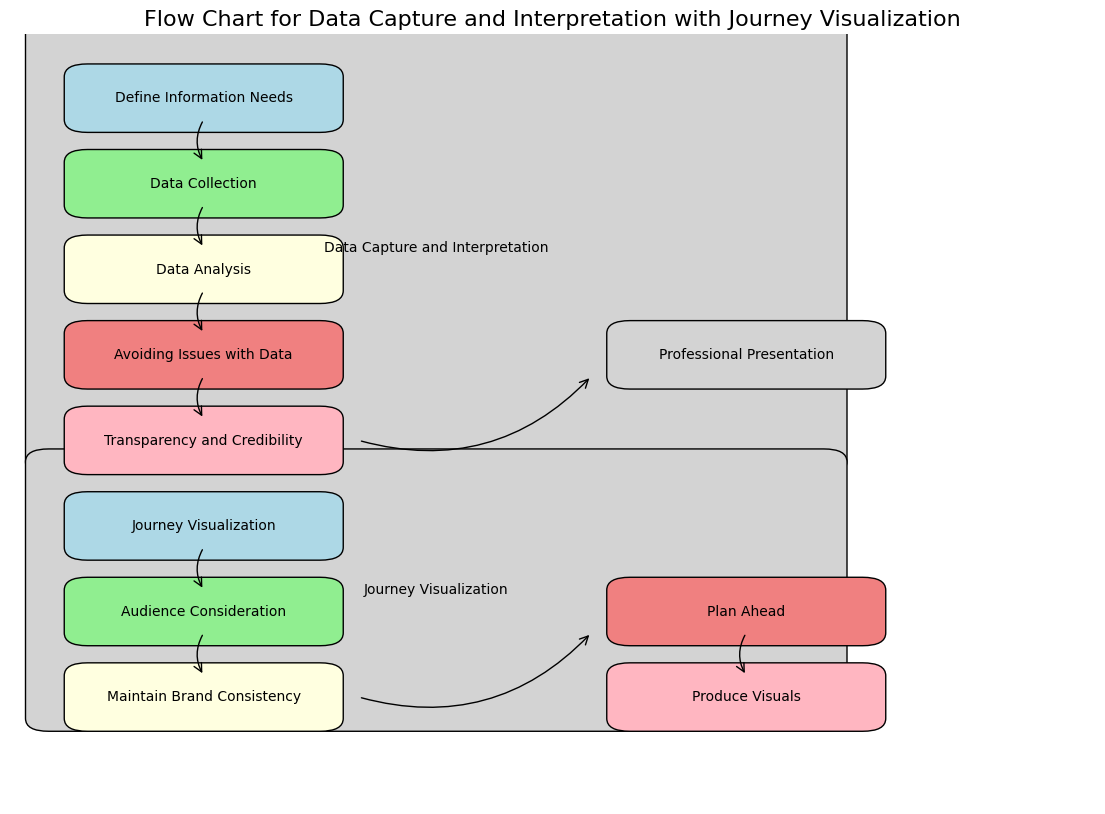

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(14, 10))

# Create a flowchart with boxes and arrows
def draw_box(ax, text, xy, box_style, facecolor, width=3, height=1):
    box = patches.FancyBboxPatch(xy, width=width, height=height, boxstyle=box_style, facecolor=facecolor, edgecolor='black')
    ax.add_patch(box)
    ax.text(xy[0] + width / 2, xy[1] + height / 2, text, ha='center', va='center', fontsize=10)

def draw_arrow(ax, start, end):
    arrow = patches.FancyArrowPatch(start, end, connectionstyle="arc3,rad=0.3", color='black', arrowstyle='->', mutation_scale=15)
    ax.add_patch(arrow)

# Data Capture and Interpretation Boxes
boxes = [
    ("Define Information Needs", (1, 14), "round,pad=0.3", "lightblue"),
    ("Data Collection", (1, 12), "round,pad=0.3", "lightgreen"),
    ("Data Analysis", (1, 10), "round,pad=0.3", "lightyellow"),
    ("Avoiding Issues with Data", (1, 8), "round,pad=0.3", "lightcoral"),
    ("Transparency and Credibility", (1, 6), "round,pad=0.3", "lightpink"),
    ("Professional Presentation", (8, 8), "round,pad=0.3", "lightgrey")
]

# Journey Visualization Boxes
journey_boxes = [
    ("Journey Visualization", (1, 4), "round,pad=0.3", "lightblue"),
    ("Audience Consideration", (1, 2), "round,pad=0.3", "lightgreen"),
    ("Maintain Brand Consistency", (1, 0), "round,pad=0.3", "lightyellow"),
    ("Plan Ahead", (8, 2), "round,pad=0.3", "lightcoral"),
    ("Produce Visuals", (8, 0), "round,pad=0.3", "lightpink")
]

# Arrows for Data Capture and Interpretation
arrows = [
    ((2.5, 14), (2.5, 13)),
    ((2.5, 12), (2.5, 11)),
    ((2.5, 10), (2.5, 9)),
    ((2.5, 8), (2.5, 7)),
    ((4.5, 6.5), (7.5, 8))
]

# Arrows for Journey Visualization
journey_arrows = [
    ((2.5, 4), (2.5, 3)),
    ((2.5, 2), (2.5, 1)),
    ((4.5, 0.5), (7.5, 2)),
    ((9.5, 2), (9.5, 1))
]

# Draw phase boxes
draw_box(ax, "Data Capture and Interpretation", (0.5, 6), "round,pad=0.3", "lightgrey", width=10, height=10)
draw_box(ax, "Journey Visualization", (0.5, 0), "round,pad=0.3", "lightgrey", width=10, height=6)

# Draw Data Capture and Interpretation Boxes
for text, xy, box_style, facecolor in boxes:
    draw_box(ax, text, xy, box_style, facecolor)

# Draw Journey Visualization Boxes
for text, xy, box_style, facecolor in journey_boxes:
    draw_box(ax, text, xy, box_style, facecolor)

# Draw Arrows
for start, end in arrows + journey_arrows:
    draw_arrow(ax, start, end)

# Hide axes
ax.set_xlim(0, 14)
ax.set_ylim(-2, 16)
ax.axis('off')

plt.title("Flow Chart for Data Capture and Interpretation with Journey Visualization", fontsize=16)
plt.show()


# LINE CHART FOR RANKINGS

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

df = pd.read_csv('official.csv',
                 header=0,
                 usecols=["University Name", "2018", "2019", "2020", "2021", "2022", "2023", "2024", "2025"])

# Melt the DataFrame to convert from wide to long format
df_long = df.melt(id_vars=['University Name'], var_name='Year', value_name='Ranking')

fig_line = px.line(df_long, x="Year", y="Ranking", color='University Name')

# Update layout for clarity
fig_line.update_layout(
    xaxis_title='Year',
    yaxis_title='QS Ranking',
    yaxis=dict(autorange='reversed'),  # Rankings: lower is better
    legend_title='University'
)

fig_line.update_layout(
    title=go.layout.Title(
        text="<b>International NZ Uni Rankings</b><br><sup>QS Rankings from 2018 to 2025</sup>",
        font=dict(
            family="Courier New, monospace",
            size=25,
            color='#002D72'
        ),
        xref="paper",
        x=0.5,
        xanchor='center',
        yanchor='top'
    ),

    xaxis_title="Metrics",
    yaxis_title="Ranking",
    legend=dict(
        font=dict(
            family="Courier New, monospace",
            size=12,
            color="black"
        )
    ),
  
    annotations=[
        dict(
            xref='paper', 
            yref='paper',
            x=0, 
            y=-0.2,
            showarrow=False,
            text="Source: <a href='https://www.topuniversities.com/universities/university-auckland'>QS Rankings</a>",
            font=dict(
                family="Courier New, monospace",
                size=12,
                color="black"
            )
        )
    ]
)


fig_line.show()

In [ ]:
import pandas as pd
import plotly.express as px

# Read the dataset
df = pd.read_csv('data.csv', header=0, usecols=["University Name", "2018", "2019", "2020", "2021", "2022", "2023", "2024", "2025"])

# Melt the DataFrame to convert from wide to long format
df_long = df.melt(id_vars=['University Name'], var_name='Year', value_name='Ranking')

# Create the area chart
fig_area = px.area(df_long, x="Year", y="Ranking", color='University Name')

# Update layout for clarity
fig_area.update_layout(
    xaxis_title='Year',
    yaxis_title='QS Ranking',
    yaxis=dict(autorange='reversed'),  # Rankings: lower is better
    legend_title='University'
)

# Update layout for title and annotations
fig_area.update_layout(
    title={
        'text': "International QS rankings of New Zealand Universities",
        'font': {
            'family': "DIN Pro, Arial, sans-serif",
            'size': 36,
            'color': '#002D72'
        },
        'x': 0.5,
         xref="paper",
        'xanchor': 'center',
        'yanchor': 'auto'
    },
    xaxis_title="Year",
    yaxis_title="QS Ranking",
    annotations=[
        dict(
            xref='paper', 
            yref='paper',
            x=0, 
            y=-0.2,
            showarrow=False,
            text="Source: <a href='https://www.topuniversities.com/universities/university-auckland'>QS Rankings</a>, <a href='https://www.timeshighereducation.com/world-university-rankings/university-auckland'>THE Rankings</a>",
            font=dict(
                family="Arial, sans-serif",
                size=12,
                color="black"
            )
        )
    ]
)

# Show the figure
fig_area.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

#creating the line chart
df = pd.read_csv('data.csv',
                 header=0,
                 usecols=["University Name", "N2018", "N2019", "N2020", "N2021", "N2022", "N2023", "N2024", "N2025"])

# Melt the DataFrame to convert from wide to long format
df_long = df.melt(id_vars=['University Name'], var_name='Year', value_name='Ranking')

fig_line = px.line(df_long, x="Year", y="Ranking", color='University Name')

# Update layout for clarity
fig_line.update_layout(
    xaxis_title='Year',
    yaxis_title='QS Ranking',
    yaxis=dict(autorange='reversed'),  # Rankings: lower is better
    legend_title='University'
)
fig_line.update_layout(
    title=go.layout.Title(
        text="International QS rankings of New Zealand Universities<br><sup>Data from QS Top Universities from 2018 to 2025. (https://www.topuniversities.com)</sup>",
        xref="paper",
        x=0
    ),)


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Read the dataset
df = pd.read_csv('data.csv', usecols=[
    "University Name", 
    "Academic reputation (QS25)", 
    "Teaching quality (THE24)", 
    "Employment Outcomes (QS25)", 
    "Research quality (THE24)", 
    "International Research Network (QS25)", 
    "Employer Reputation (QS25)"
])

# Filter the DataFrame to include only the row for "University of Auckland"
df_auckland = df[df['University Name'] == 'University of Auckland']

# Extract the relevant data for plotting
metrics = [
    "Academic reputation (QS25)", 
    "Teaching quality (THE24)", 
    "Employment Outcomes (QS25)", 
    "Research quality (THE24)", 
    "International Research Network (QS25)", 
    "Employer Reputation (QS25)"
]

# Extract the values
values = df_auckland[metrics].values.flatten().tolist()

# Create the bar chart
fig = go.Figure(go.Bar(
    x=metrics, 
    y=values, 
    marker_color='darkslateblue',
    text=values,  # Add text labels
    textposition='auto'  # Automatically position text labels
))

# Update layout
fig.update_layout(
    title={
        'text': "University of Auckland Rankings",
        'font': {
            'family': "DIN Pro, Arial, sans-serif",
            'size': 36,
            'color': '#002D72'
        },
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title="Metrics",
    yaxis_title="Ranking",
  
    annotations=[
        dict(
            xref='paper', 
            yref='paper',
            x=0, 
            y=-0.2,
            showarrow=False,
            text="Source: <a href='https://www.topuniversities.com/universities/university-auckland'>QS Rankings</a>, <a href='https://www.timeshighereducation.com/world-university-rankings/university-auckland'>THE Rankings</a>",
            font=dict(
                family="Arial, sans-serif",
                size=12,
                color="black"
            )
        )
    ]
)

# Show the figure
fig.show()


In [4]:
import pandas as pd
import plotly.graph_objects as go

# Read the dataset
df = pd.read_csv('data.csv', usecols=[
    "University Name", 
    "Academic reputation (QS25)", 
    "Teaching quality (THE24)", 
    "Employment Outcomes (QS25)", 
    "Research quality (THE24)", 
    "International Research Network (QS25)", 
    "Employer Reputation (QS25)"
])

# Filter the DataFrame to include only the row for "University of Auckland"
df_auckland = df[df['University Name'] == 'University of Auckland']

# Extract the relevant data for plotting
metrics = [
    "Academic reputation (QS25)", 
    "Teaching quality (THE24)", 
    "Employment Outcomes (QS25)", 
    "Research quality (THE24)", 
    "International Research Network (QS25)", 
    "Employer Reputation (QS25)"
]

# Extract the values
values = df_auckland[metrics].values.flatten().tolist()

# Create the horizontal bar chart
fig = go.Figure(go.Bar(
    y=metrics,  # Use metrics on y-axis for horizontal bars
    x=values,  # Use values on x-axis
    orientation='h',  # Set the orientation to horizontal
    marker_color='darkslateblue',
    text=values,  # Add text labels
    textposition='auto'  # Automatically position text labels
))

# Update layout
fig.update_layout(
    title={
        'text': "University of Auckland Rankings",
        'font': {
            'family': "DIN Pro, Arial, sans-serif",
            'size': 36,
            'color': '#002D72'
        },
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    yaxis_title="Metrics",
    xaxis_title="Ranking",
      # Reverse the x-axis to have higher rankings at the top
    annotations=[
        dict(
            xref='paper', 
            yref='paper',
            x=0, 
            y=-0.2,
            showarrow=False,
            text="Source: <a href='https://www.topuniversities.com/universities/university-auckland'>QS Rankings</a>, <a href='https://www.timeshighereducation.com/world-university-rankings/university-auckland'>THE Rankings</a>",
            font=dict(
                family="Arial, sans-serif",
                size=12,
                color="black"
            )
        )
    ]
)

# Show the figure
fig.show()


FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

# radar chart

In [ ]:
fig.update_traces(fill='toself')

In [ ]:
import pandas as pd
import plotly.express as px

# Read the dataset
df = pd.read_csv('data.csv', header=0, usecols=[
    "University Name", 
    "Academic reputation (QS25)", 
    "Teaching quality (THE24)", 
    "Employment Outcomes (QS25)", 
    "Research quality (THE24)", 
    "International Research Network (QS25)", 
    "Employer Reputation (QS25)"
])

# Filter the DataFrame to include only the row for "University of Auckland"
df_auckland = df[df['University Name'] == 'University of Auckland']

# Create the data for the radar chart
df_radar = pd.DataFrame(dict(
    r=df_auckland[[
        "Academic reputation (QS25)", 
        "Teaching quality (THE24)", 
        "Employment Outcomes (QS25)", 
        "Research quality (THE24)", 
        "International Research Network (QS25)", 
        "Employer Reputation (QS25)"
    ]].values.flatten().tolist(),
    theta=[
        'Academic reputation (QS25)', 
        'Teaching quality (THE24)', 
        'Employment Outcomes (QS25)', 
        'Research quality (THE24)', 
        'International Research Network (QS25)', 
        'Employer Reputation (QS25)'
    ]
))

# Create the radar chart
fig_radar = px.line_polar(df_radar, r='r', theta='theta', line_close=True)

# Update the traces to fill the area and set the fill color
fig_radar.update_traces(fill='toself', fillcolor='rgba(72, 61, 139, 0.5)', line_color='darkslateblue')

# Add data labels
fig_radar.update_traces(mode='lines+markers+text', text=df_radar['r'], textposition='top center')

# Update layout with title and annotations
fig_radar.update_layout(
    title={
        'text': "University of Auckland Rankings",
        'font': {
            'family': "DIN Pro, Arial, sans-serif",
            'size': 36,
            'color': '#002D72'
        },
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'auto'
    },
    annotations=[
        dict(
            xref='paper', 
            yref='paper',
            x=0.2, 
            y=-0.2,
            showarrow=False,
            text="Source: <a href='https://www.topuniversities.com/universities/university-auckland'>QS Rankings</a>, <a href='https://www.timeshighereducation.com/world-university-rankings/university-auckland'>THE Rankings</a>",
            font=dict(
                family="Arial, sans-serif",
                size=12,
                color="black"
            )
        )
    ]
)

# Show the figure
fig_radar.show()


EXTRA(for fun)

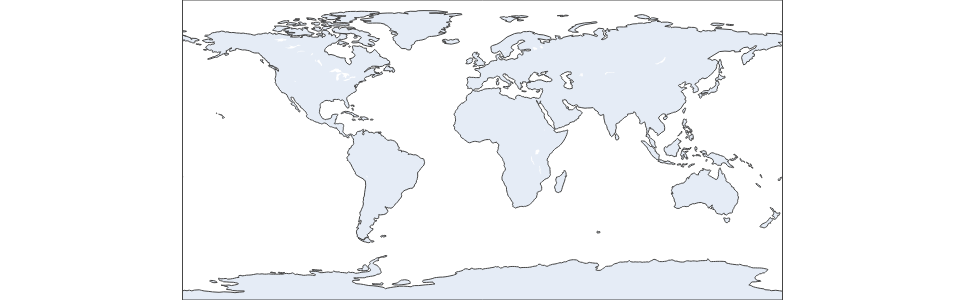

In [5]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

fig = go.Figure(go.Scattergeo())
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# LAYOUT

In [6]:
# Run this app with `python app.py` and
# visit http://127.0.0.1:8050/ in your web browser.


from dash import Dash, html, dcc
import plotly.express as px
import pandas as pd

app = Dash(__name__)

# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options
df = pd.DataFrame({
    "Fruit": ["Apples", "Oranges", "Bananas", "Apples", "Oranges", "Bananas"],
    "Amount": [4, 1, 2, 2, 4, 5],
    "City": ["SF", "SF", "SF", "Montreal", "Montreal", "Montreal"]
})

fig = px.bar(df, x="Fruit", y="Amount", color="City", barmode="group")

app.layout = html.Div(children=[
    html.H1(children='Hello Dash'),

    html.Div(children='''
        Dash: A web application framework for your data.
    '''),

    dcc.Graph(
        id='example-graph',
        figure=fig
    )
])

if __name__ == "__main__":
    app.run_server(debug=True, port=8058)


In [7]:
import pandas as pd
import plotly.express as px

# Read the dataset
df = pd.read_csv('data.csv', header=0, usecols=["University Name", "2018", "2019", "2020", "2021", "2022", "2023", "2024", "2025"])

# Melt the DataFrame to convert from wide to long format
df_long = df.melt(id_vars=['University Name'], var_name='Year', value_name='Ranking')

# Create the line chart
fig_line = px.line(df_long, x="Year", y="Ranking", color='University Name')

# Create the area chart
fig_area = px.area(df_long, x="Year", y="Ranking", color='University Name', line_group='University Name')

# Update the layout for both figures
fig_line.update_layout(
    xaxis_title='Year',
    yaxis_title='QS Ranking',
    yaxis=dict(autorange='reversed'),  # Rankings: lower is better
    legend_title='University',
    title={
        'text': "International QS rankings of New Zealand Universities",
        'font': {
            'family': "DIN Pro, Arial, sans-serif",
            'size': 36,
            'color': '#002D72'
        },
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'auto'
    },
    annotations=[
        dict(
            xref='paper', 
            yref='paper',
            x=0, 
            y=-0.2,
            showarrow=False,
            text="Source: <a href='https://www.topuniversities.com/universities/university-auckland'>QS Rankings</a>, <a href='https://www.timeshighereducation.com/world-university-rankings/university-auckland'>THE Rankings</a>",
            font=dict(
                family="Arial, sans-serif",
                size=12,
                color="black"
            )
        )
    ]
)

# Update the area chart layout to match the line chart


# Combine the line and area charts
fig_combined = go.Figure(data=fig_area.data + fig_line.data)

fig_combined.update_layout(
    xaxis_title='Year',
    yaxis_title='QS Ranking',
    yaxis=dict(autorange='reversed'),  # Rankings: lower is better
    legend_title='University',
    title={
        'text': "International QS rankings of New Zealand Universities",
        'font': {
            'family': "DIN Pro, Arial, sans-serif",
            'size': 36,
            'color': '#002D72'
        },
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'auto'
    },
    annotations=[
        dict(
            xref='paper', 
            yref='paper',
            x=0, 
            y=-0.2,
            showarrow=False,
            text="Source: <a href='https://www.topuniversities.com/universities/university-auckland'>QS Rankings</a>, <a href='https://www.timeshighereducation.com/world-university-rankings/university-auckland'>THE Rankings</a>",
            font=dict(
                family="Arial, sans-serif",
                size=12,
                color="black"
            )
        )
    ]
)


# Show the combined figure
fig_combined.show()


FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

Maps

In [ ]:
import plotly.graph_objects as go

mapbox_access_token = open(".mapbox_token").read()

fig = go.Figure(go.Scattermapbox(
        lat=['45.5017'],
        lon=['-73.5673'],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=14
        ),
        text=['Montreal'],
    ))

fig.update_layout(
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=go.layout.mapbox.Center(
            lat=45,
            lon=-73
        ),
        pitch=0,
        zoom=5
    )
)

fig.show()